The following script takes in a 3D volumetric image and does some stuff.

In [45]:
import matplotlib.pyplot as plt
import numpy as np

path = "data/npy/battery"
name = "image_pred"
volume = np.load(f"{path}/{name}.npy")

Try to understand the value distribution of the volume

In [51]:
print('shape', volume.shape)
print('min', np.min(volume))
print('max', np.max(volume))
print('mean', np.mean(volume))

shape (256, 256, 256)
min 0.0
max 1.0
mean 0.2469681


Drawing the density histogram

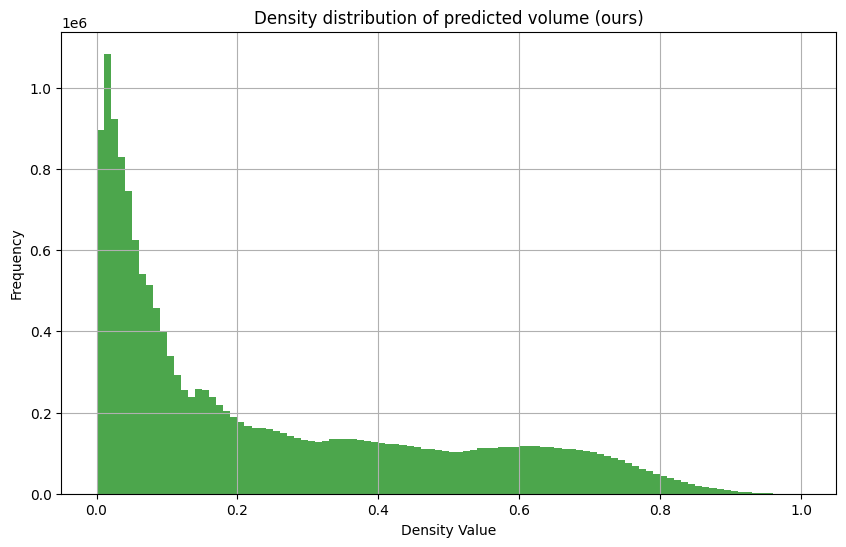

In [50]:
def draw_histogram(volume, title='3D volume', log=False):
    volume_flat = volume.flatten()
    plt.figure(figsize=(10, 6))
    plt.hist(volume_flat, bins=100, color='green', alpha=0.7, log=log)
    plt.title(f"Density distribution of {title}")
    plt.xlabel("Density Value")
    plt.ylabel("Frequency")
    plt.grid(True)
    plt.show()

volume = (volume - np.min(volume)) / (np.max(volume) - np.min(volume))
draw_histogram(volume, title='predicted volume (ours)', log=False)

We isolate densities between low and high thresholds

Thresholded!


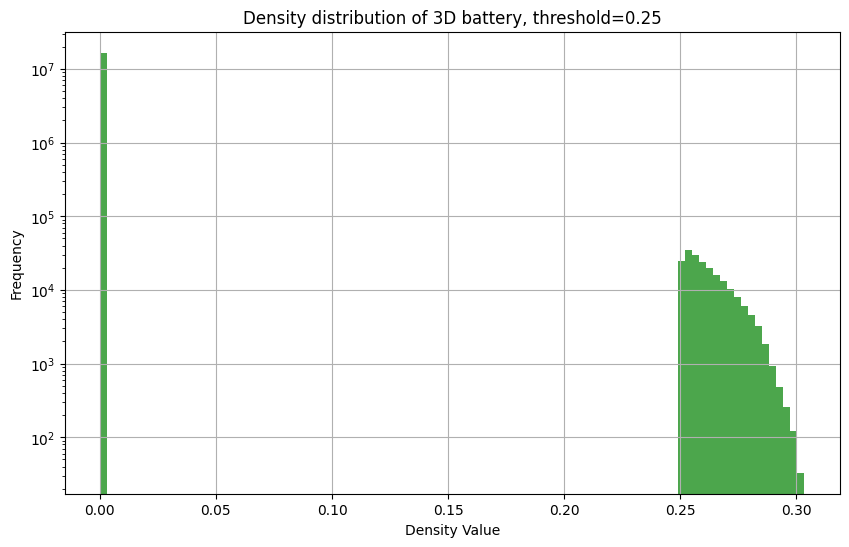

In [36]:
low_threshold = 0.25

volume[volume < low_threshold] = 0
np.save("data/npy/battery/thresholded.npy", volume)

print("Thresholded!")

draw_histogram(volume, title=f'3D battery, threshold={low_threshold}', log=True)


Before norm.
type:float32, min:0.016887016594409943, max:0.30348914861679077
After norm.
type:float32, min:0.0, max:1.0


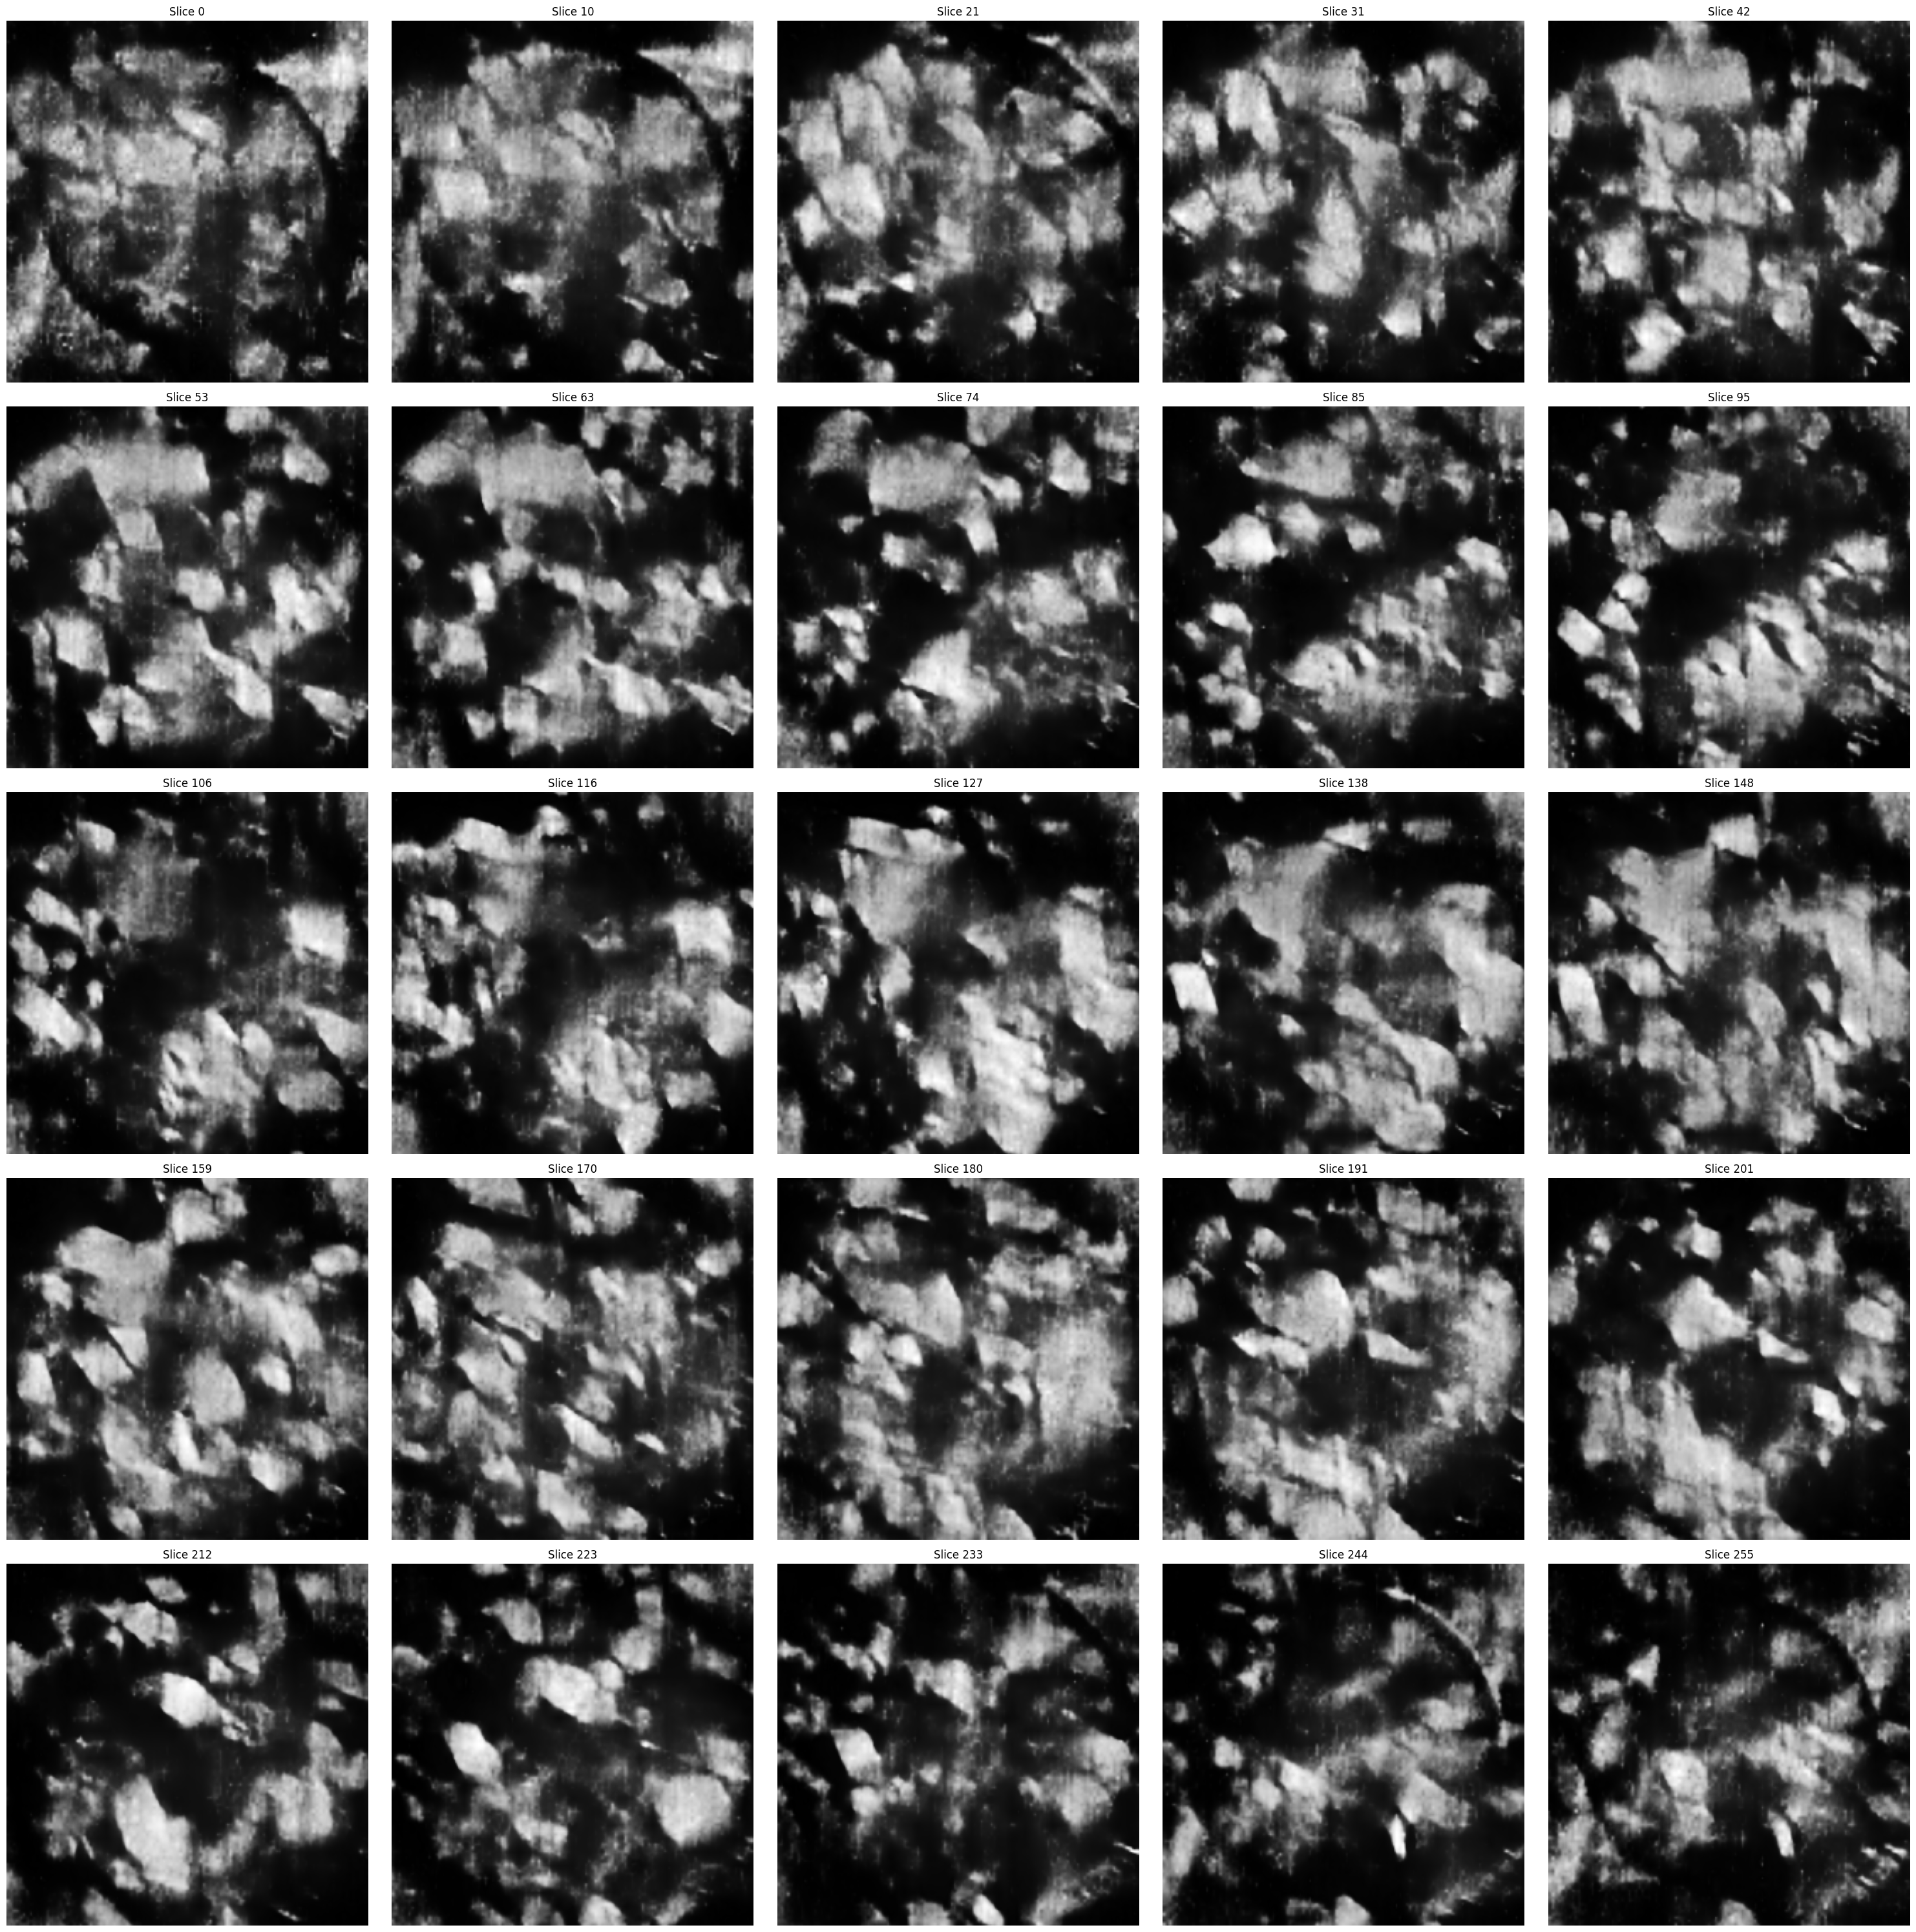

In [17]:
# Normalization
print("Before norm.")
print(f"type:{volume.dtype}, min:{volume.min()}, max:{volume.max()}")

volume = (volume - np.min(volume)) / (np.max(volume) - np.min(volume))

print("After norm.")
print(f"type:{volume.dtype}, min:{volume.min()}, max:{volume.max()}")

#  Get the number of slices and their dimensions
num_slices = volume.shape[2]  # Assuming the shape is (depth, height, width)
height, width = volume.shape[0], volume.shape[1]

# Select a number of slices to display
num_display_slices = 25  # Choose how many slices to display
slices_to_display = np.linspace(0, num_slices - 1, num_display_slices).astype(int)

# Create a grid of subplots
rows = 5  # Number of rows in the grid
cols = 5  # Number of columns in the grid
fig, axs = plt.subplots(rows, cols, figsize=(30, 30))

# Iterate over the selected slices and plot them
for ax, slice_index in zip(axs.flatten(), slices_to_display):
    ax.imshow(volume[:, :, slice_index], cmap='gray')
    ax.set_title(f'Slice {slice_index}')
    ax.axis('off')  # Hide the axes

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()
